### Comapre implementations with SASFit (SASfit-0.94.12-macos64)

This notebooks provides comparisions between the implementation of the micelles models as plugins for SASView (via sasmodels). 

SASFit GUI was used to generate I(q) profiles with the same parameters as shown in the following cells for different micelle geometries (in nm) and saved in `/tests/sasfit/`.  

You can run this notebook in a Google colab by copy-pasting the GitHub URL of this notebook in a [Google colab](https://stackoverflow.com/questions/62596466/how-can-i-run-notebooks-of-a-github-project-in-google-colab). 

You would have to run the following installation commands before running any of the computation cells below:
```python
!pip install sasmodels==1.0.7 sasdata==0.8.1
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sasmodels.core import load_model
from sasmodels.direct_model import call_kernel
import pandas as pd

## Spherical core 

*BlockCopolymerMicelle*

https://github.com/SASfit/SASfit/blob/master/src/sasfit_ff/sasfit_ff_BlockCopolymerMicelle.c

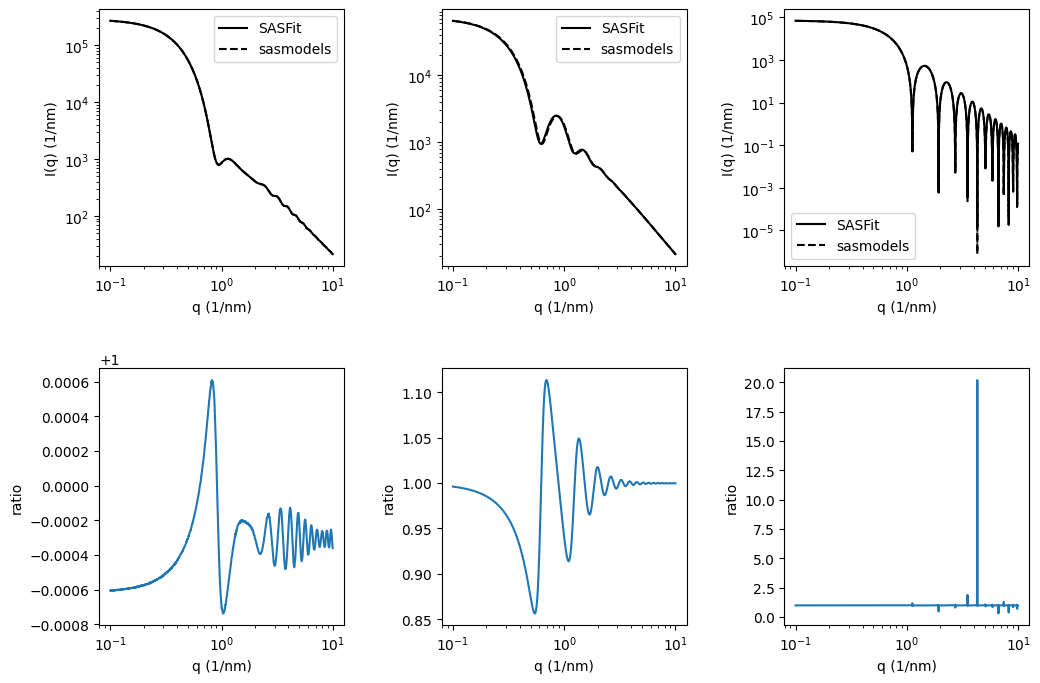

CPU times: user 1.46 s, sys: 113 ms, total: 1.57 s
Wall time: 1.08 s


In [2]:
%%time
files = ["01_sph_homogenous", "01_sph_shell", "01_sph_core"]
model = load_model("../models/spherical_micelle.py")

fig, axs = plt.subplots(2,3, figsize=(3*4, 2*4))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
# contrasts in the order of solvent, core, corona
contrasts = [[1,2,2], # homogenous
[1,1,2], # corona/shell
[1,2,1] # core
] 
for i in range(3):
    rho_solv, rho_s, rho_c = contrasts[i]
    sphere_params = {'scale':1.0,
        'background' : 0.0,
        'v_core' : 4.0,    
        'v_corona' : 4.0,
        'sld_solvent' : rho_solv,
        'sld_core' : rho_s,
        'sld_corona' : rho_c,
        'radius_core': 4.0,
        'rg': 1.0,
        'd_penetration':1.0,
        } 
    data_sasfit = pd.read_csv("./sasfit/%s"%files[i], sep=";", header=None).iloc[:,[0,1]]
    q = data_sasfit.iloc[:,0] 
    Iq_sasfit = data_sasfit.iloc[:,1]
    axs[0,i].loglog(q, Iq_sasfit, color='k', label="SASFit")

    kernel = model.make_kernel([q])
    Iq_sasmodels = call_kernel(kernel, sphere_params)
    axs[0,i].loglog(q, Iq_sasmodels, ls='--', color='k', label="sasmodels")

    # axs[0,i].set_xlim([1e-2, 1e0])
    axs[0,i].set_xlabel(r'q (1/nm)')
    axs[0,i].set_ylabel(r'I(q) (1/nm)')
    axs[0,i].legend()

    axs[1,i].plot(q, Iq_sasfit/Iq_sasmodels)
    axs[1,i].set_xlabel(r'q (1/nm)')
    axs[1,i].set_ylabel(r'ratio')
    axs[1,i].set_xscale('log')
plt.show()

## Cylinder

*CYL+Chains(RW)_Rc* 
https://github.com/SASfit/SASfit/blob/master/src/sasfit_ff/cyl_rwbrush/sasfit_ff_cyl_rwbrush_rc.c

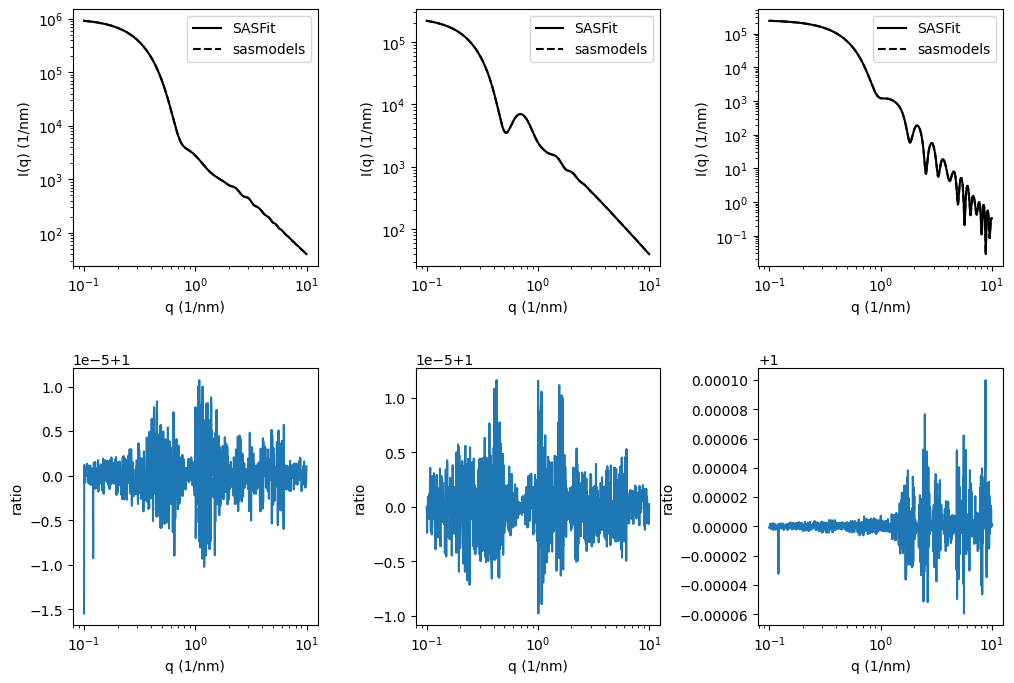

In [3]:
files = ["02_cyl_homogenous", "02_cyl_shell", "02_cyl_core"]
model = load_model("../models/cylindrical_micelle.py")

fig, axs = plt.subplots(2,3, figsize=(3*4, 2*4))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
contrasts = [[1,2,2], [1,1,2], [1,2,1]]
for i in range(3):
    rho_solv, rho_s, rho_c = contrasts[i]
    cyl_params = {'v_core' : 4.0,    
            'v_corona' : 4.0,
            'sld_solvent' : rho_solv,
            'sld_core' : rho_s,
            'sld_corona' : rho_c,
            'radius_core': 4.0,
            'length_core' : 10.0,
            'rg': 1.0,
            'd_penetration':1.0,
            'scale':1.0,
            'background' : 0.0,
            }
    data_sasfit = pd.read_csv("./sasfit/%s"%files[i], sep=";", header=None).iloc[:,[0,1]]
    q = data_sasfit.iloc[:,0] # to convert into angstroms
    Iq_sasfit = data_sasfit.iloc[:,1]
    axs[0,i].loglog(q, Iq_sasfit, color='k', label="SASFit")
    kernel = model.make_kernel([q])
    Iq_sasmodels = call_kernel(kernel, cyl_params)
    axs[0,i].loglog(q, Iq_sasmodels, ls='--', color='k', label="sasmodels")
    axs[0,i].set_xlabel(r'q (1/nm)')
    axs[0,i].set_ylabel(r'I(q) (1/nm)')
    axs[0,i].legend()
    axs[1,i].plot(q, Iq_sasfit/Iq_sasmodels)
    axs[1,i].set_xlabel(r'q (1/nm)')
    axs[1,i].set_ylabel(r'ratio')
    axs[1,i].set_xscale('log')
plt.show()

## Long cylinder or Rod 

*ROD+Chains(RW)_Rc* 

https://github.com/SASfit/SASfit/blob/master/src/sasfit_ff/sasfit_ff_Rod_RWbrush.c

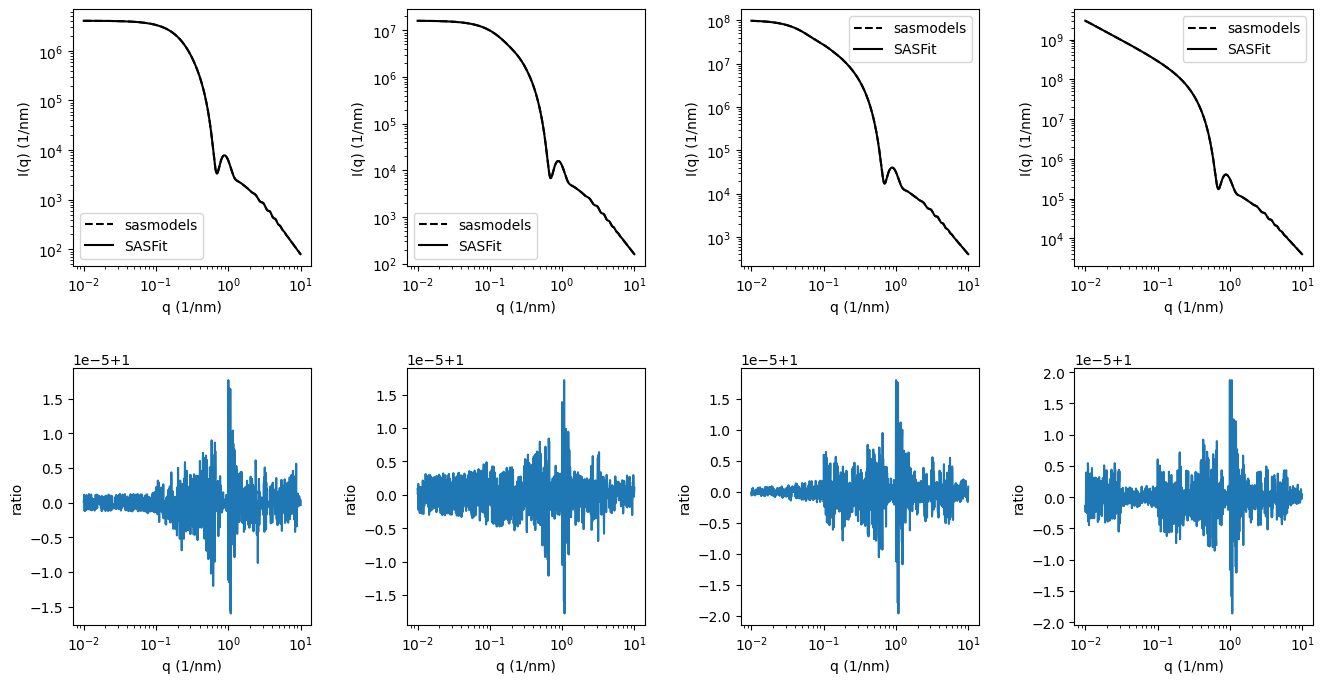

In [4]:
files = ["03_rod_20nm", "03_rod_40nm", "03_rod_100nm", "03_rod_1000nm"]
model = load_model("../models/longcylinder_micelle.py")

fig, axs = plt.subplots(2,4, figsize=(4*4, 2*4))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

lengths = [20,40,100,1000] 
for i in range(4):
    cyl_params = {'v_core' : 4.0,    
            'v_corona' : 4.0,
            'sld_solvent' : 1.0,
            'sld_core' : 2.0,
            'sld_corona' : 2.0,
            'radius_core': 4.0,
            'length_core' : lengths[i],
            'rg': 1.0,
            'd_penetration':1.0,
            'scale':1.0,
            'background' : 0.0,
            }
    data_sasfit = pd.read_csv("./sasfit/%s"%files[i], sep=";", header=None).iloc[:,[0,1]]
    q = data_sasfit.iloc[:,0] # to convert into angstroms
    Iq_sasfit = data_sasfit.iloc[:,1]
    kernel = model.make_kernel([q])
    Iq_sasmodels = call_kernel(kernel, cyl_params)
    axs[0,i].loglog(q, Iq_sasmodels, ls='--', color='k', label="sasmodels")
    axs[0,i].loglog(q, Iq_sasfit, color='k', label="SASFit")
    axs[0,i].set_xlabel(r'q (1/nm)')
    axs[0,i].set_ylabel(r'I(q) (1/nm)')
    axs[0,i].legend()
    axs[1,i].plot(q, Iq_sasfit/Iq_sasmodels)
    axs[1,i].set_xscale('log')
    axs[1,i].set_xlabel(r'q (1/nm)')
    axs[1,i].set_ylabel(r'ratio')
plt.show()